In [2]:
import imutils
import numpy as np
import cv2
from matplotlib import pyplot as plt

http://eric-yuan.me/ransac/ <- RANSAC
http://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/ <- OpenCV Panorama Stitchig Tutorial
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html <- matcher example

In [3]:
# loading of the two images we want to stitch together
imageA = cv2.imread('carmel-00.png')
imageB = cv2.imread('carmel-01.png')
# resizing (not recommended for real use)
imageA = imutils.resize(imageA, width=600)
imageB = imutils.resize(imageB, width=600)

In [4]:
# detecting the keypoints
keypointDetector = cv2.ORB_create()

keypointsA, descriptorsA = keypointDetector.detectAndCompute(imageA, None)
keypointsB, descriptorsB = keypointDetector.detectAndCompute(imageB, None)
img_tmpA = cv2.drawKeypoints(imageA, keypointsA, imageA, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('kpA.png', img_tmp)
img_tmpB = cv2.drawKeypoints(imageB, keypointsB, imageB, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('kpB.png', img_tmp)
#?keypointDetector

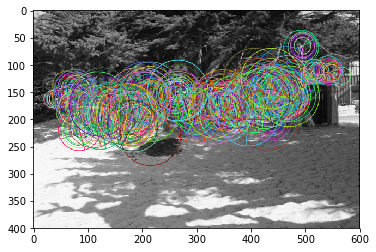

(<matplotlib.image.AxesImage at 0x7f9a9fd676a0>, None)

In [5]:
plt.imshow(img_tmpA), plt.show()

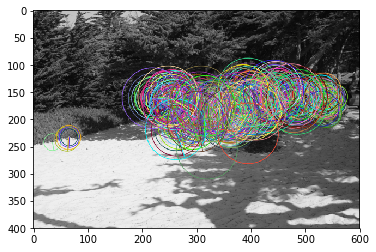

(<matplotlib.image.AxesImage at 0x7f9a9fcc2eb8>, None)

In [6]:
plt.imshow(img_tmpB), plt.show()

In [81]:
bf = matcher = cv2.DescriptorMatcher_create("BruteForce")
rawMatches = matcher.knnMatch(descriptorsA, descriptorsB, 2)

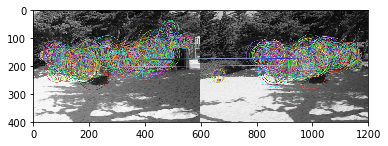

(<matplotlib.image.AxesImage at 0x7f9a8ec360f0>, None)

In [82]:
# sorting the matches by their distance
matches = sorted(matches, key = lambda x:x.distance)
# drawing the matches on img3 (had to initialize it as None, 'cause)
img3 = None
img3=cv2.drawMatches(imageA,keypointsA,imageB,keypointsB,matches[:10],img3, flags=2)
plt.imshow(img3),plt.show()

In [83]:
# https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python
matches = matches[:10]
aIndices = [mat.queryIdx for mat in matches]
bIndices = [mat.trainIdx for mat in matches]
aPoints = np.array([keypointsA[aind].pt for aind in aIndices])
bPoints = np.array([keypointsB[bind].pt for bind in bIndices])


In [84]:
#h, status = cv2.findHomography(aPoints, bPoints)
#aPoints
#print(h)
(H, status) = cv2.findHomography(aPoints, bPoints, cv2.RANSAC, 4)

In [85]:
result = cv2.warpPerspective(imageA, h, (1000, 1000))

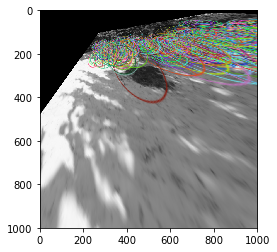

(<matplotlib.image.AxesImage at 0x7f9a8ebb6128>, None)

In [86]:
plt.imshow(result),plt.show()

In [55]:
cv2.imwrite('out.png', result)

True